In [1]:
%matplotlib inline

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.path as mpath
import warnings;warnings.filterwarnings("ignore")

In [3]:
large = 28; med = 24; small = 15
params = {'axes.titlesize': small,
          'legend.fontsize': small,
          'figure.figsize': (8, 4),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': small,
          'figure.titlesize': med,
          'axes.titlepad': 10}
#          'axes.facecolor': 'black'} # For electric background plots
plt.rcParams.update(params)

In [4]:
def get_hurricane():
    u = np.array([  [2.444,7.553],
                    [0.513,7.046],
                    [-1.243,5.433],
                    [-2.353,2.975],
                    [-2.578,0.092],
                    [-2.075,-1.795],
                    [-0.336,-2.870],
                    [2.609,-2.016]  ])
    u[:,0] -= 0.098
    codes = [1] + [2]*(len(u)-2) + [2] 
    u = np.append(u, -u[::-1], axis=0)
    codes += codes

    return mpath.Path(3*u, codes, closed=False)

hurricane = get_hurricane()

In [5]:
omega = 7*10**-5 
# assign empty arrays for theta,f and b planes
theta = np.arange(-89,90.1,0.1)
f = np.zeros(np.shape(theta))
b5 = np.zeros(np.shape(theta))
b45 = np.zeros(np.shape(theta))

# f-plane approx
f5=2*omega*np.sin(5*np.pi/180)
f45=2*omega*np.sin(45*np.pi/180)


In [6]:
# full f: fplane = 2Ωsinθ
f = 2*omega*np.sin(theta*(np.pi/180))

# b plane:  β = fplane + 2Ω(θ-θ_0)cosθ
b5 = f5 + 2*omega*((theta-5)*(np.pi/180))*np.cos(5*np.pi/180)
b45 = f45 + 2*omega*((theta-45)*(np.pi/180))*np.cos(45*np.pi/180)
        
# error
PE5f = np.abs((f-f5)/f)*100
PE45f = np.abs((f-f45)/f)*100

PE5b = np.abs((f-b5)/f)*100
PE45b = np.abs((f-b45)/f)*100

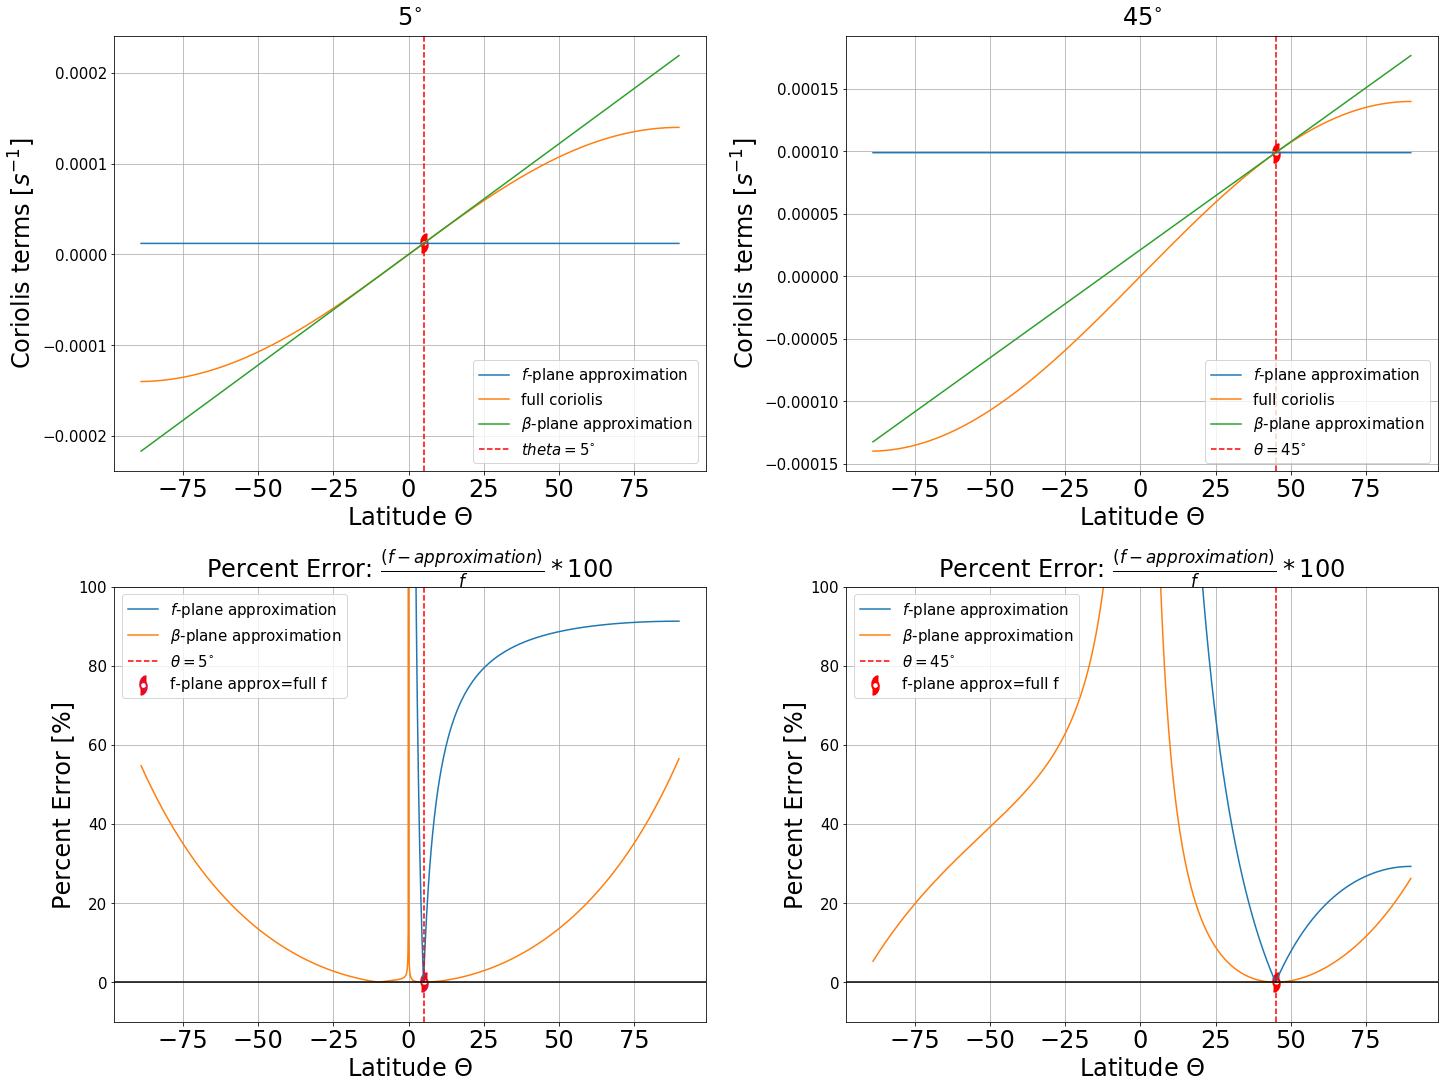

In [9]:
# v = u,0,0
# f x v =2uomega sin 0
# = |f||u|
# can just look at f term

fig1 = plt.figure(figsize=(20,15),constrained_layout=True)
spec2 = gs.GridSpec(ncols=2, nrows=2, figure=fig1)

###############################################################
f_ax1 = fig1.add_subplot(spec2[0, 0])
plt.plot(theta,f5*np.ones(len(theta)),label=r'$f$-plane approximation'); # full f
plt.plot(theta,f,label='full coriolis') # 
plt.plot(theta,b5,label=r'$\beta$-plane approximation')
plt.scatter(5,f[np.where(np.abs(f-f5)<0.00000001)],c='r',s=350,marker=hurricane,
            facecolors='none',linewidth=2)
plt.axvline(x=5,label=r'$theta=5^{\circ}$',linestyle='--',color='red')

plt.title('$5^{\circ}$')
plt.xlabel('Latitude $\Theta$'); plt.ylabel(r'Coriolis terms [$s^{-1}$]'); 
plt.legend(loc='lower right')
plt.grid()

###############################################################
f_ax2 = fig1.add_subplot(spec2[0, 1])
plt.plot(theta,f45*np.ones(len(theta)),label=r'$f$-plane approximation'); # full f
plt.plot(theta,f,label='full coriolis') # 
plt.plot(theta,b45,label=r'$\beta$-plane approximation')
plt.scatter(45,f[np.where(np.abs(f-f45)<0.00000001)],c='r',s=350,marker=hurricane,
            facecolors='none',linewidth=2)
plt.axvline(x=45,label=r'$\theta=45^{\circ}$',linestyle='--',color='red')

plt.title('$45^{\circ}$')
plt.xlabel('Latitude $\Theta$'); plt.ylabel(r'Coriolis terms [$s^{-1}$]'); 
plt.legend(loc='lower right')
plt.grid()

###############################################################
f_ax3 = fig1.add_subplot(spec2[1, 0])
plt.plot(theta,PE5f,label=r'$f$-plane approximation')
plt.plot(theta,PE5b,label=r'$\beta$-plane approximation')
plt.scatter(5,0,c='r',s=350, marker=hurricane, 
            edgecolors="crimson", facecolors='none', linewidth=2, label='f-plane approx=full f')
plt.axvline(x=5,label=r'$\theta=5^{\circ}$',linestyle='--',color='red')
plt.axhline(0,color='k')

plt.ylim(-10,100)
plt.title(r'Percent Error: $\frac{(f-approximation)}{f}*100$')
plt.xlabel('Latitude $\Theta$');
plt.ylabel('Percent Error [%]')
plt.legend(loc='upper left')
plt.grid()

###############################################################
f_ax4 = fig1.add_subplot(spec2[1, 1])
# plt.plot(theta,10e4*AE45,label='Abs Error')
plt.plot(theta,PE45f,label=r'$f$-plane approximation')
plt.plot(theta,PE45b,label=r'$\beta$-plane approximation')
plt.scatter(45,0,c='r',s=350,marker=hurricane,
            facecolors='none',linewidth=2,label='f-plane approx=full f')
plt.axvline(x=45,label=r'$\theta=45^{\circ}$',linestyle='--',color='red')
plt.axhline(0,color='k')

plt.ylim(-10,100)
plt.xlabel('Latitude $\Theta$');
plt.ylabel('Percent Error [%]')
plt.title(r'Percent Error: $\frac{(f-approximation)}{f}*100$')
plt.legend(loc='upper left')
plt.grid()

plt.savefig('/Users/tyler/Desktop/601/HW3/ATS601_HW3Q3.png',dpi=600,bbox_inches='tight')

### Find latitudes that are within 5% of percent error for each plane approximation

In [8]:
print('Valid range from f-plane 5 deg: ',np.min(theta[PE5f<5]),'-',np.max(theta[PE5f<5]),'deg N')
print('Valid range from -plane 45 deg: ',np.min(theta[PE45f<5]),'-',np.max(theta[PE45f<5]),'deg N')
print('Valid range from B-plane 5 deg: ',np.min(theta[PE5b<5]),'-',np.max(theta[PE5b<5]),'deg N')
print('Valid range from B-plane 45 deg: ',np.min(theta[PE45b<5]),'-',np.max(theta[PE45b<5]),'deg N')


Valid range from f-plane 5 deg:  4.799999999994668 - 5.199999999994645 deg N
Valid range from -plane 45 deg:  42.39999999999253 - 48.09999999999221 deg N
Valid range from B-plane 5 deg:  -32.100000000003234 - 31.799999999993133 deg N
Valid range from B-plane 45 deg:  29.19999999999328 - 64.39999999999128 deg N


- And to fully answer the question: the Latitudes outside these ranges for each approximation for 5 and 45 degrees are no longer valid/useful approximations.